In [2]:
!conda install pillow -y
!conda install matplotlib -y 

Fetching package metadata ...........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /home/yvan/anaconda3/envs/data_sci_bowl_2018:
#
pillow                    5.0.0            py36h3deb7b8_0  
Fetching package metadata ...........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /home/yvan/anaconda3/envs/data_sci_bowl_2018:
#
matplotlib                2.1.2            py36h0e671d2_0  


Some quick setup for seeing images.

Unizp data files

In [9]:
data_dir = '/home/yvan/projects/data_sci_bowl_2018/data'
%mkdir -p $data_dir
%cd $data_dir
%pwd

/home/yvan/projects/data_sci_bowl_2018/data


'/home/yvan/projects/data_sci_bowl_2018/data'

In [18]:
USER = os.environ['KAGGLE_USER']
PASS = os.environ['KAGGLE_PASS']

In [43]:
%rm -rf $data_dir/*
!pip install kaggle-cli
!kg download -u $USER -p $PASS -c data-science-bowl-2018

downloading https://www.kaggle.com/c/data-science-bowl-2018/download/stage1_sample_submission.csv.zip

stage1_sample_submission.csv.zip 100% |#############| Time: 0:00:00  10.2 KiB/s

downloading https://www.kaggle.com/c/data-science-bowl-2018/download/stage1_train_labels.csv.zip

stage1_train_labels.csv.zip 100% |##################| Time: 0:00:00   7.7 MiB/s

downloading https://www.kaggle.com/c/data-science-bowl-2018/download/stage1_test.zip

stage1_test.zip 100% |##############################| Time: 0:00:00  20.4 MiB/s

downloading https://www.kaggle.com/c/data-science-bowl-2018/download/stage1_train.zip

stage1_train.zip 100% |#############################| Time: 0:00:01  40.3 MiB/s



In [49]:
for z in pathlib.Path(data_dir).glob('*'):
    print(f'unzipping: {z}')
    new_folder = os.path.splitext(z)[0]
    os.mkdir(new_folder)
    z = ZipFile(os.path.join(data_dir, z), 'r')
    z.extractall(new_folder)
    z.close()

unzipping: /home/yvan/projects/data_sci_bowl_2018/data/stage1_test.zip
unzipping: /home/yvan/projects/data_sci_bowl_2018/data/stage1_train_labels.csv.zip
unzipping: /home/yvan/projects/data_sci_bowl_2018/data/stage1_sample_submission.csv.zip
unzipping: /home/yvan/projects/data_sci_bowl_2018/data/stage1_train.zip


In [51]:
%ls -lah

total 92M
drwxrwxr-x   6 yvan yvan  76K Feb 13 20:03 ./
drwxrwxr-x   4 yvan yvan 4.0K Feb 13 20:04 ../
drwxrwxr-x   2 yvan yvan 4.0K Feb 13 20:03 stage1_sample_submission.csv/
-rw-rw-r--   1 yvan yvan 2.7K Feb 13 19:59 stage1_sample_submission.csv.zip
drwxrwxr-x  67 yvan yvan  12K Feb 13 20:03 stage1_test/
-rw-rw-r--   1 yvan yvan 9.2M Feb 13 19:59 stage1_test.zip
drwxrwxr-x 672 yvan yvan  72K Feb 13 20:03 stage1_train/
drwxrwxr-x   2 yvan yvan 4.0K Feb 13 20:03 stage1_train_labels.csv/
-rw-rw-r--   1 yvan yvan 2.7M Feb 13 19:59 stage1_train_labels.csv.zip
-rw-rw-r--   1 yvan yvan  80M Feb 13 19:59 stage1_train.zip


In [62]:
!conda install pandas -y

Fetching package metadata ...........
Solving package specifications: .

Package plan for installation in environment /home/yvan/anaconda3/envs/data_sci_bowl_2018:

The following NEW packages will be INSTALLED:

    pandas: 0.22.0-py36hf484d3e_0

pandas-0.22.0- 100% |################################| Time: 0:00:00  80.88 MB/s


In [5]:
data_dir = '/home/yvan/projects/data_sci_bowl_2018/data'
%mkdir -p $data_dir
%cd $data_dir
%pwd

/home/yvan/projects/data_sci_bowl_2018/data


'/home/yvan/projects/data_sci_bowl_2018/data'

In [6]:
import os
import pathlib
from zipfile import ZipFile

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import glob
import pandas as pd

data_dir = '/home/yvan/projects/data_sci_bowl_2018/data'
%cd $data_dir

def show_one(file):
    image = Image.open(file, 'r')
    plt.imshow(np.asarray(image))
    plt.axis('off')
    
def show_n(img_files, n=6):
    _, ax = plt.subplots(1, n, sharex='col', sharey='row', figsize=(24,24))
    if n == 1:
        img = Image.open(img_files[0], 'r')
        ax.imshow(np.asarray(img))
    else:
        for i, img_file in enumerate(img_files):
            img = Image.open(img_file, 'r')
            ax[i].imshow(np.asarray(img))
            ax[i].axis('off')
            
def chunker(seq, size):
    return (seq[pos:pos + size] for pos in range(0, len(seq), size))

/home/yvan/projects/data_sci_bowl_2018/data


In [7]:
labels = pd.read_csv(os.path.join('stage1_train_labels.csv/', 'stage1_train_labels.csv'))
labels.head()

,ImageId,EncodedPixels
0,00071198d059ba7f5914a526d124d28e6d010c92466da2...,6908 1 7161 8 7417 8 7672 9 7928 9 8184 9 8440...
1,00071198d059ba7f5914a526d124d28e6d010c92466da2...,36269 7 36523 11 36778 13 37033 15 37288 17 37...
2,00071198d059ba7f5914a526d124d28e6d010c92466da2...,19919 6 20174 8 20429 10 20685 11 20941 12 211...
3,00071198d059ba7f5914a526d124d28e6d010c92466da2...,18671 6 18926 8 19181 9 19436 10 19691 11 1994...
4,00071198d059ba7f5914a526d124d28e6d010c92466da2...,40158 3 40413 5 40669 5 40925 5 41182 3


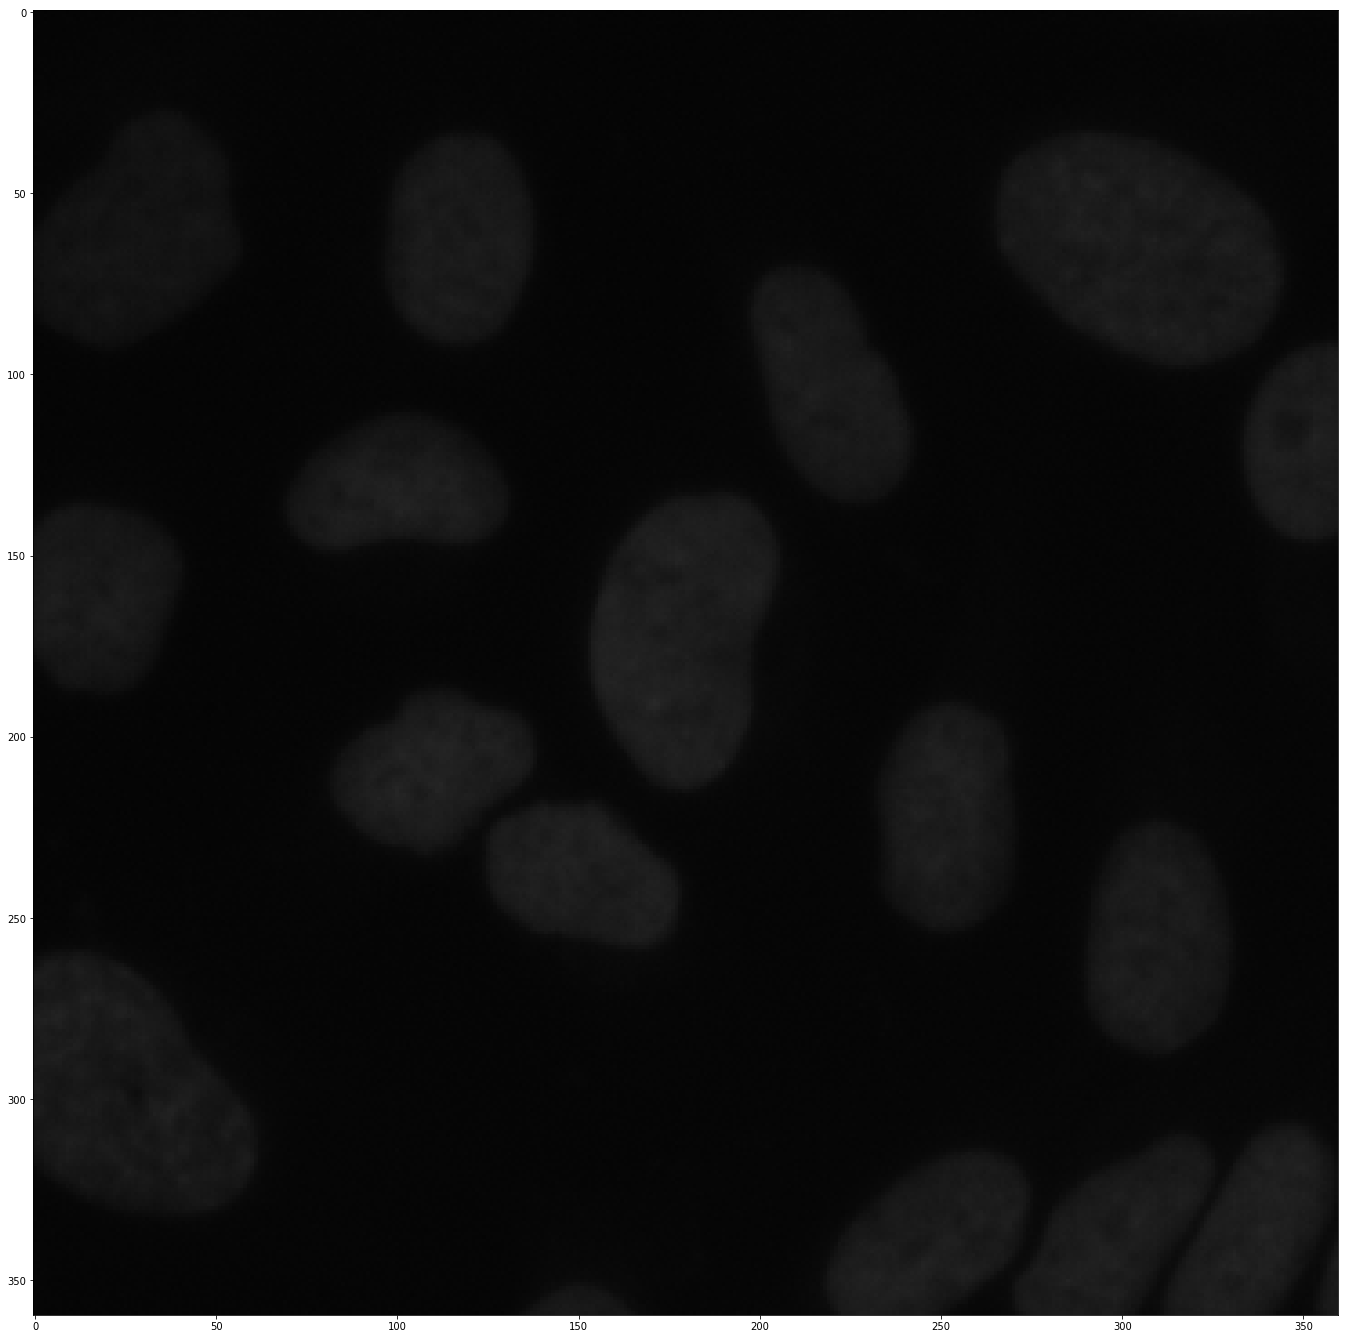

In [8]:
Z = 10
view_ids = list(labels['ImageId'].drop_duplicates())
imgs = [glob.glob(os.path.join(data_dir, 'stage1_train', f_id, 'images','*.png'))[0] for f_id in view_ids]
show_n([imgs[Z]], n =1)

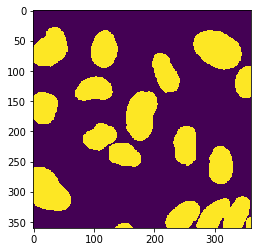

In [9]:
mask_sets = [glob.glob(os.path.join(data_dir, 'stage1_train', f_id, 'masks','*.png')) for f_id in view_ids]
_ = plt.imshow(sum([np.asarray(Image.open(img_file, 'r')) for img_file in mask_sets[Z]]))

In [150]:
names = []
images = []
combined_masks = []
for f_id in view_ids:
    image = glob.glob(os.path.join(data_dir, 'stage1_train', f_id, 'images','*.png'))
    mask_sets = glob.glob(os.path.join(data_dir, 'stage1_train', f_id, 'masks','*.png'))
    masks = [np.asarray(Image.open(img_file, 'r')) for img_file in mask_sets]
    if len(image) > 0 and len(masks) > 0:
        mask = Image.fromarray(sum(masks+[np.zeros(masks[0].shape)])).convert('RGB')
        pimg = Image.fromarray(np.asarray(Image.open(image[0], 'r'))).convert('RGB')
        names.append(f_id)
        combined_masks.append(mask)
        images.append(pimg)

In [151]:
type(combined_masks[0]),type(images[0])

(PIL.Image.Image, PIL.Image.Image)

670 670


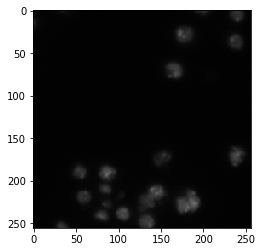

In [152]:
print(len(images), len(combined_masks))
_ = plt.imshow(images[0])

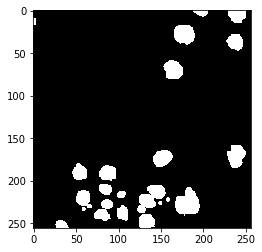

In [153]:
_ = plt.imshow(combined_masks[0])

In [156]:
train_img, train_mask = os.path.join(data_dir,'train_img'), os.path.join(data_dir,'train_mask')

if not os.path.exists(train_img):
    os.mkdir(train_img)
if not os.path.exists(train_mask):
    os.mkdir(train_mask)
    
for image, mask, name in zip(images, combined_masks, names):
    image.save(os.path.join(train_img, name+'_img.jpg'))
    mask.save(os.path.join(train_mask, name+'_mask.jpg'))

In [160]:
os.listdir(train_img)[:5]

['317832f90f02c5e916b2ac0f3bcb8da9928d8e400b747b2c68e544e56adacf6b_img.jpg',
 'b6d50fa22380ae3a7e8c52c5bc44a254e7b2596fd8927980dbe2c160cb5689b5_img.jpg',
 '52a4ac5a875be7a6c886035d54fb63f5f397dc43508c4831898f6b2f8debc7f3_img.jpg',
 'e5a6c5e01e6a4ef676a2d975374e995dd55792ea317a8e110bebc37da83a4ce8_img.jpg',
 '718751b439c05bdd589f04fcef321a86be3ecb35292a435138e295e05eb2e771_img.jpg']

In [159]:
os.listdir(train_mask)[:5]

['c2a646a819f59a4e816e0ee8ea00ba10d5de9ac20b5a435c41192637790dabee_mask.jpg',
 'c9f305be17312bdb9530fb4f1adc6d29730ddbe0e74730cbf031de174bf437b7_mask.jpg',
 'dae976f161fe42dc58dee87d4bf2eb9f65736597cab0114138641b2a39a5c42b_mask.jpg',
 'bde3727f3a9e8b2b58f383ebc762b2157eb50cdbff23e69b025418b43967556b_mask.jpg',
 '4d14a3629b6af6de86d850be236b833a7bfcbf6d8665fd73c6dc339e06c14607_mask.jpg']

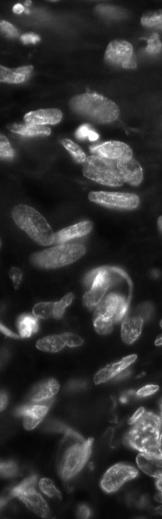

In [49]:
img_paths = glob.glob(os.path.join(data_dir, 'test_img', 'all', '*.jpg'))
Image.open(img_paths[2])